# Telcom Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("C:/Data/Telco-Customer-Churn.csv")

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not.

In [6]:
df.drop(["customerID"], inplace = True, axis = 1)

In [7]:
def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

#### Gender, SeniorCitizen, Partner, Dependents

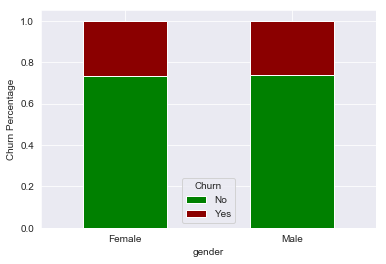

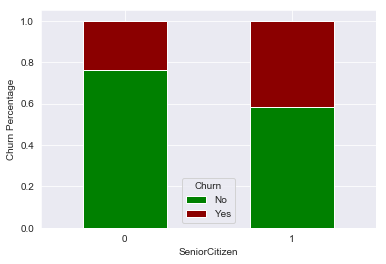

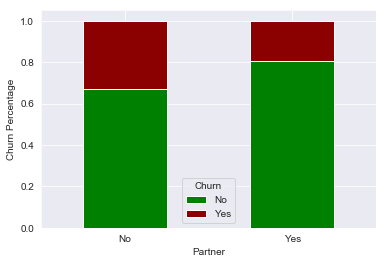

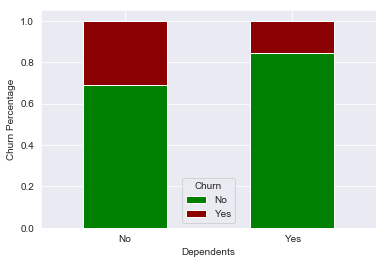

In [8]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

From above plots, we can say following:
- Gender does not help us predict the customer churn.
- If a person is young and has a family, he or she is less likely to stop the service. The reason might be the busy life, more money or another factors.

I will drop gender variable from the analysis.

In [9]:
df.drop('gender', axis=1, inplace = True)

#### Tenure

In [10]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [11]:
df['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

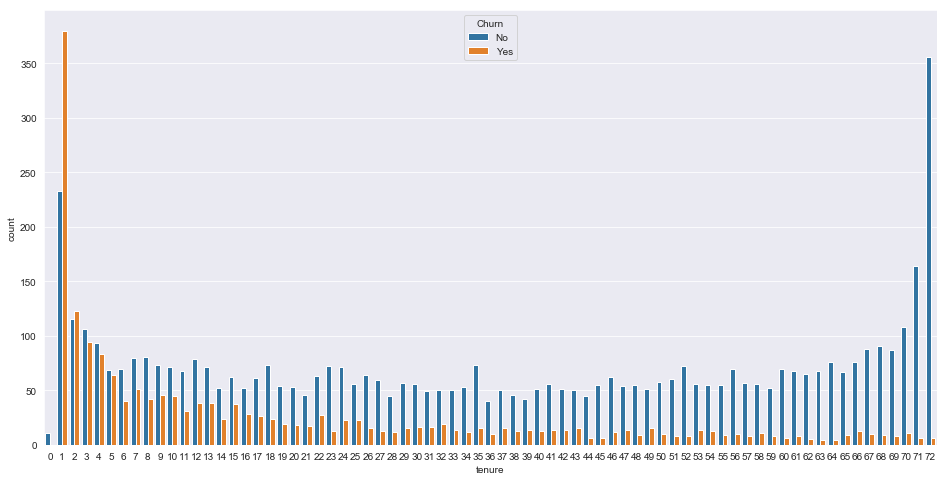

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

Converting into 5 groups to reduce model complexity.

In [13]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [14]:
df["tenure_group"].value_counts()

1    2186
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

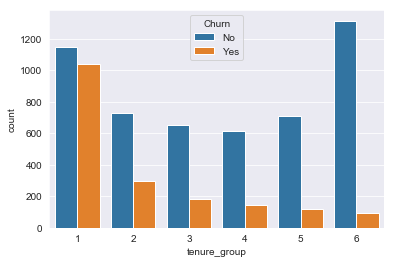

In [15]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

#### Phone Service, MultipleLines 

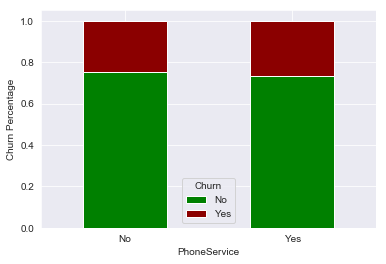

In [16]:
stacked_plot(df, "PhoneService", "Churn")

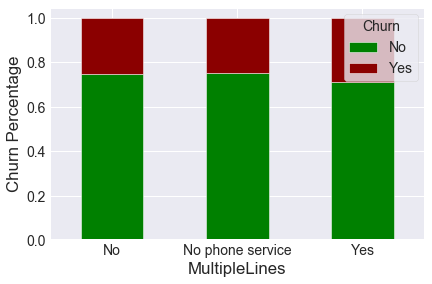

In [297]:
stacked_plot(df, "MultipleLines", "Churn")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate. This also holds true in the log-rank test of survival analysis. So, I will drop them.

In [17]:
df.drop(['MultipleLines', 'PhoneService'], axis = 1, inplace = True)

#### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

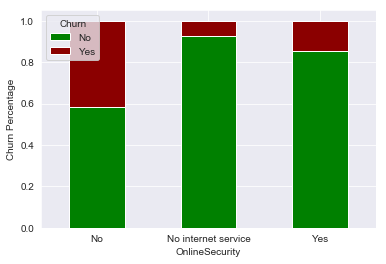

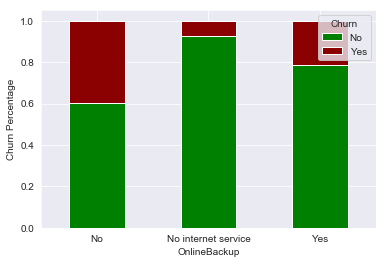

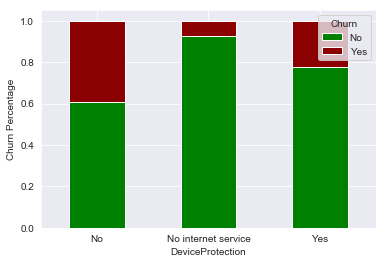

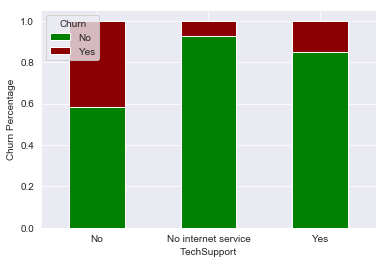

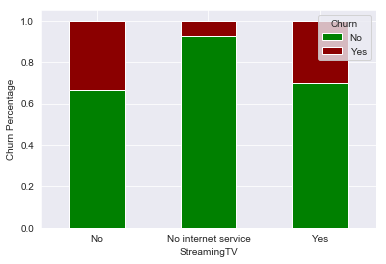

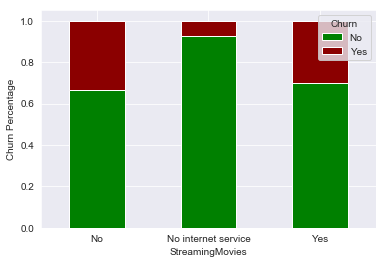

In [18]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

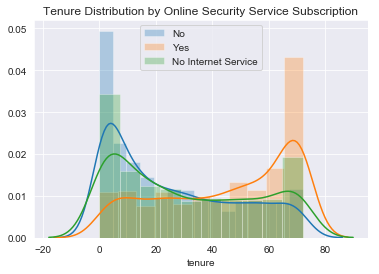

In [33]:
sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

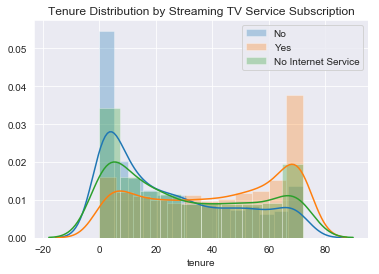

In [32]:
sns.distplot(df.tenure[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

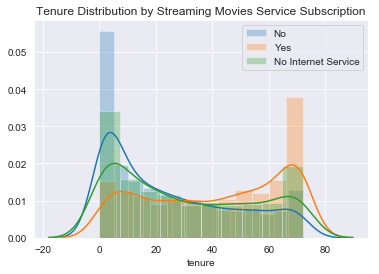

In [31]:
sns.distplot(df.tenure[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

#### InternetService

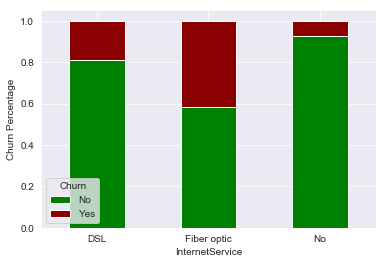

In [34]:
stacked_plot(df, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

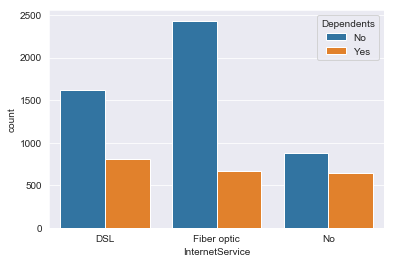

In [37]:
sns.countplot(df.InternetService, hue = df.Dependents)

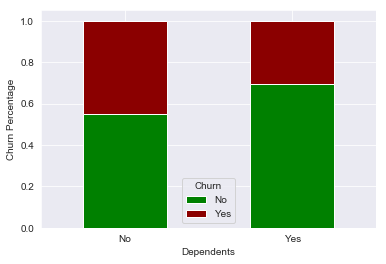

In [43]:
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

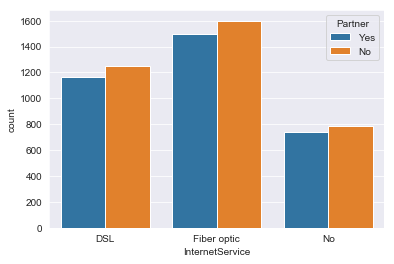

In [38]:
sns.countplot(df.InternetService, hue = df.Partner)

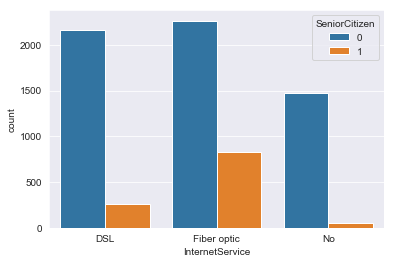

In [39]:
sns.countplot(df.InternetService, hue = df.SeniorCitizen)

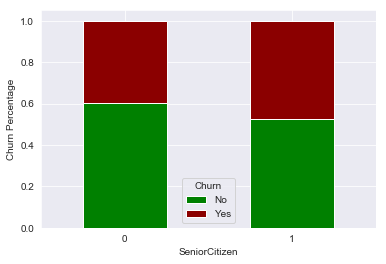

In [42]:
stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

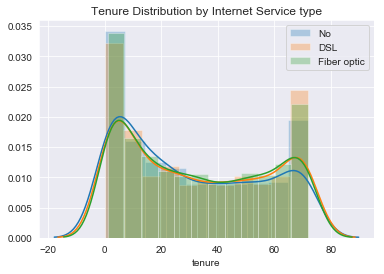

In [40]:
sns.distplot(df.tenure[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(df.tenure[df.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

#### Contract

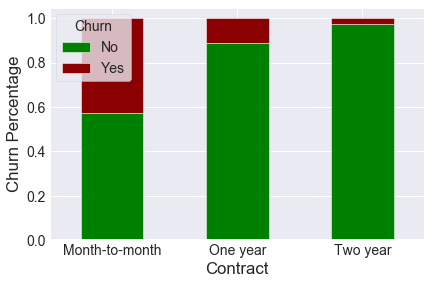

In [303]:
stacked_plot(df, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high.

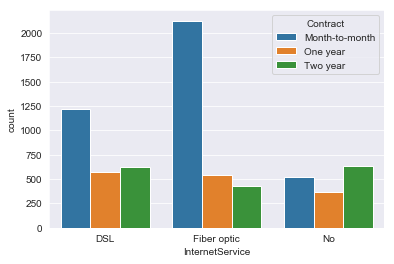

In [41]:
sns.countplot(df.InternetService, hue = df.Contract)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

#### PaymentMethod

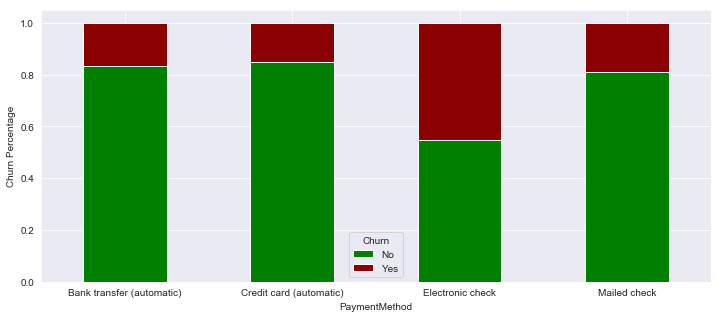

In [44]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high. 

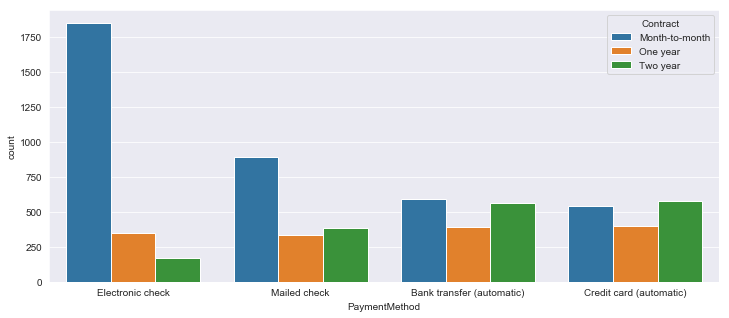

In [47]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.PaymentMethod, hue = df.Contract, ax = ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment. 

#### PaperlessBilling

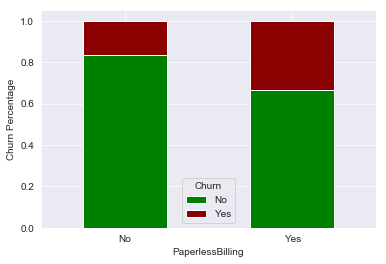

In [48]:
stacked_plot(df, "PaperlessBilling", "Churn")

#### TotalCharges

In [49]:
df.TotalCharges.describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [50]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [51]:
df['TotalCharges'].isna().sum() 

11

In [52]:
df[df["TotalCharges"].isnull()]

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
488,0,Yes,Yes,0,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,1
753,0,No,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,1
936,0,Yes,Yes,0,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,1
1082,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,1
1340,0,Yes,Yes,0,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1
3331,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,1
3826,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,1
4380,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,1
5218,0,Yes,Yes,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,1
6670,0,Yes,Yes,0,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [53]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0

In [54]:
df.isnull().any().any()

False

In [56]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]

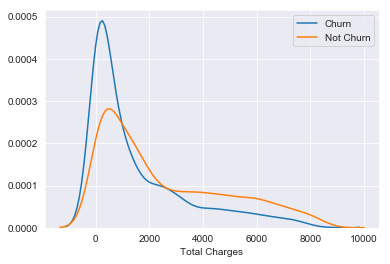

In [57]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

#### Monthly Charges

In [58]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [59]:
df.MonthlyCharges.isna().sum()

0

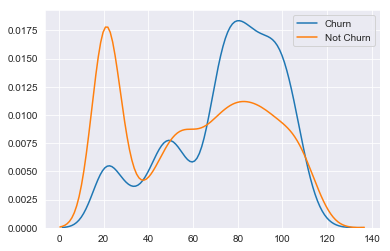

In [60]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

The customers paying high monthly fees churn more.

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [61]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.tenure)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

Since, the correlation is very high I will drop TotalCharges from analysis.

In [62]:
df.drop('TotalCharges', axis = 1, inplace = True)

Also, dropping tenure as we have tenure_group in the data.

In [63]:
df.drop('tenure', axis = 1, inplace = True)

Inspecting df

In [64]:
df.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_group
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,3
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,4
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1


In [65]:
df.shape

(7043, 16)

In [66]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [68]:
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
tenure_group          int64
dtype: object

## Visualizing data with Principal Components

Before applying Principal components analysis, I will need to encode the categorical data.

In [67]:
enc_df = df.copy()

In [69]:
enc_df.Partner = enc_df.Partner.apply(lambda x: 0 if x == "No" else 1)
enc_df.Dependents = enc_df.Dependents.apply(lambda x: 0 if x == "No" else 1)
enc_df.PaperlessBilling = enc_df.PaperlessBilling.apply(lambda x: 0 if x == "No" else 1)

enc_df = pd.get_dummies(enc_df, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)
enc_df.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,No,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,No,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,Yes,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,No,4,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,Yes,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
enc_df.shape

(7043, 26)

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(enc_df.drop('Churn', axis = 1))

In [73]:
pca_df

array([[-34.90835435,  -1.76309889],
       [ -7.81088864,  -0.12967001],
       [-10.93459622,  -2.08140926],
       ...,
       [-35.16240087,  -1.71054243],
       [  9.60449   ,  -2.45080307],
       [ 40.94462208,   2.26838041]])

In [74]:
pca.explained_variance_

array([906.88754933,   3.76651229])

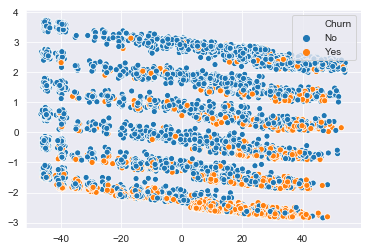

In [75]:
sns.scatterplot(x=pca_df[:,0],y= pca_df[:,1], hue = enc_df.Churn)

As we can see principal components does not result in neat clusters. We see six tilted clusters because of tenure group in our model.

## Model Building

I am going to build and tune random forest model because in this case tree based method would perform better. I am also interested in individual customer's churning probability and in understanding how the model calculates it using Shap values.

In [76]:
df.head()

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_group
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,3
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,4
4,0,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1


encoding features.

In [77]:
df.Partner = df.Partner.apply(lambda x: 0 if x == "No" else 1)
df.Dependents = df.Dependents.apply(lambda x: 0 if x == "No" else 1)
df.PaperlessBilling = df.PaperlessBilling.apply(lambda x: 0 if x == "No" else 1)

In [86]:
df.Churn = df.Churn.apply(lambda x: 0 if x == "No" else 1)

In [97]:
df = pd.get_dummies(df, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Model

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [98]:
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df['Churn'])

In [99]:
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [82]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")
    
    plt.show()

### Random Forest Hyperparameters tuning

#### grid 1

In [109]:
param_grid1 = { 'class_weight':[{0:1, 1:3}],
          'max_features':['auto', 'sqrt', 'log2'],
          'max_depth': [5, 7, 9],
          'n_estimators':[300, 500, 700],
          'oob_score':[True]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=2, cv=3, verbose=1)
grid1.fit(train_x, train_y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done  81 out of  81 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [110]:
grid1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
grid1.best_score_

0.7623358182463614

#### grid 2

In [120]:
param_grid2 = { 'class_weight':[{0:1, 1:3}],
          'max_features':['auto'],
          'max_depth': [9, 11, 13, 15],
          'n_estimators':[500, 700, 900],
          'oob_score':[True]
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=2, cv=3, verbose=1)
grid2.fit(train_x, train_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [121]:
grid2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
grid2.best_score_

0.7857649982250621

#### grid 3

In [123]:
param_grid3 = { 'class_weight':[{0:1, 1:3}],
          'max_features':['auto'],
          'max_depth': [13],
          'n_estimators':[500],
          'oob_score':[True],
          'min_samples_leaf':[2, 5, 10],
          'min_samples_split':[2, 5, 10, 20]     
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=2, cv=3, verbose=1)
grid3.fit(train_x, train_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [124]:
grid3.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
grid3.best_score_

0.77831025914093

#### grid 4

In [131]:
param_grid4 = { 'class_weight':[{0:1, 1:3}],
          'max_features':['auto'],
          'max_depth': [13],
          'n_estimators':[500],
          'oob_score':[True],
          'min_samples_leaf':[1],
          'min_samples_split':[2, 5]     
         }

rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=2, cv=3, verbose=1)
grid4.fit(train_x, train_y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:   15.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [132]:
grid4.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
grid4.best_score_

0.7845225417110401

#### Model

In [147]:
rf_model = RandomForestClassifier(class_weight={0:1, 1:3}, max_depth = 13, \
                                  n_estimators=500, oob_score=True, min_samples_leaf=1, min_samples_split=2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 3},
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409

Accuracy   Score :  0.7735982966643009
Area under curve :  0.7237993748223929 



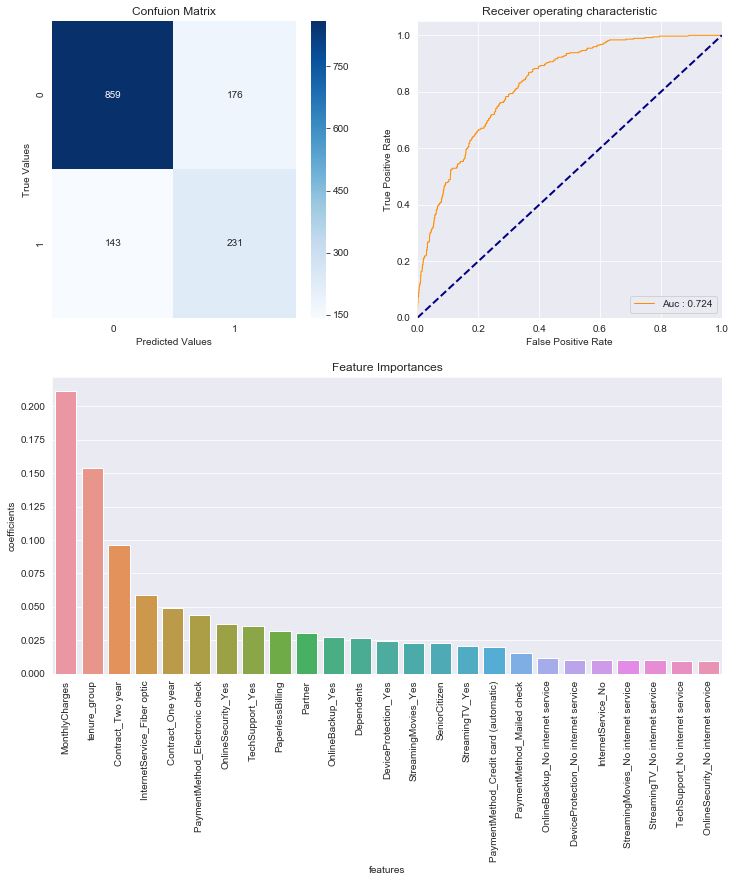

In [149]:
churn_prediction(rf_model,train_x, train_y, test_x, test_y,
                         x,"features")

### Saving model

In [150]:
import pickle
pickle.dump(rf_model, open('model.pkl','wb'))

## Explaining Model

In [152]:
import eli5
from eli5.sklearn import PermutationImportance

from pdpbox import pdp, info_plots

In [153]:
perm = PermutationImportance(rf_model, random_state=1).fit(test_x, test_y)
eli5.show_weights(perm, feature_names = test_x.columns.tolist(), top = 25)

Weight,Feature
0.0206 ± 0.0133,Contract_One year
0.0187 ± 0.0066,InternetService_Fiber optic
0.0136 ± 0.0112,tenure_group
0.0112 ± 0.0135,Contract_Two year
0.0035 ± 0.0055,OnlineBackup_Yes
0.0028 ± 0.0027,DeviceProtection_No internet service
0.0021 ± 0.0059,OnlineSecurity_Yes
0.0016 ± 0.0017,OnlineSecurity_No internet service
0.0016 ± 0.0019,StreamingTV_No internet service
0.0010 ± 0.0019,TechSupport_No internet service


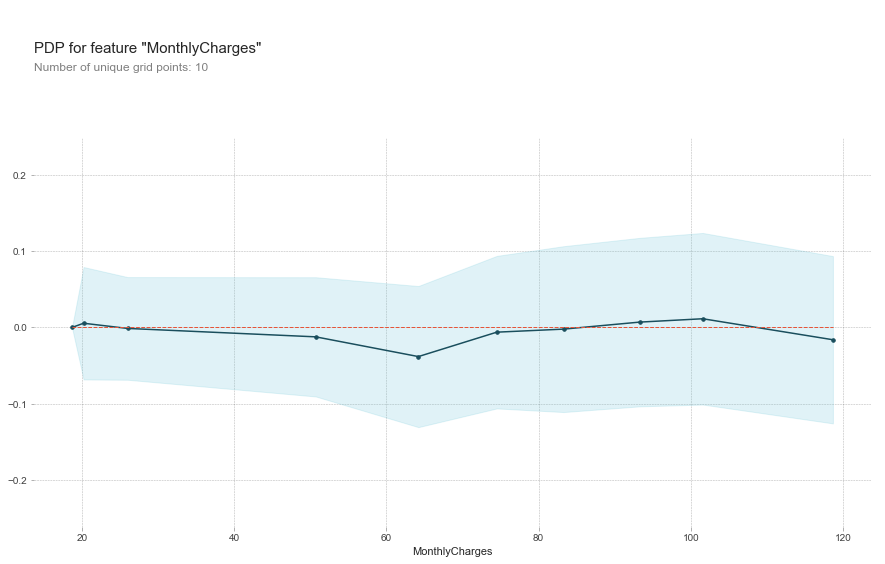

In [172]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=test_x, model_features=test_x.columns.values, feature='MonthlyCharges')
pdp.pdp_plot(pdp_p, 'MonthlyCharges')
plt.show()

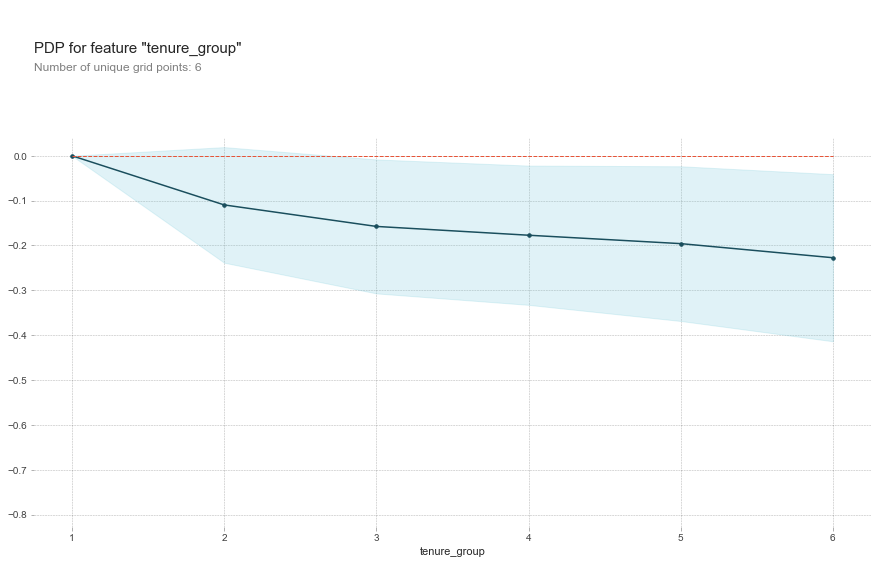

In [174]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=test_x, model_features=test_x.columns.values, feature='tenure_group')
pdp.pdp_plot(pdp_p, 'tenure_group')
plt.show()

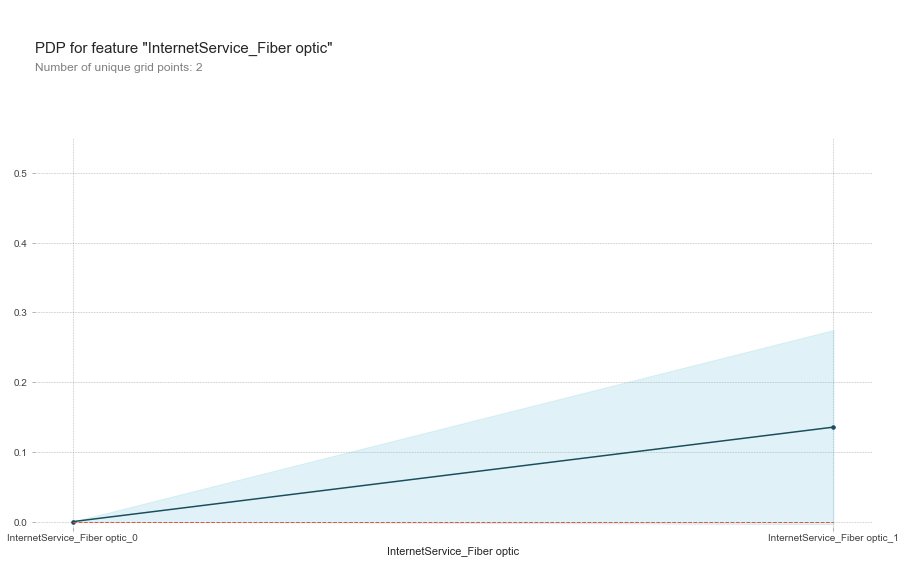

In [175]:
pdp_p = pdp.pdp_isolate(model=rf_model, dataset=test_x, model_features=test_x.columns.values, feature='InternetService_Fiber optic')
pdp.pdp_plot(pdp_p, 'InternetService_Fiber optic')
plt.show()

In [176]:
test_x.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'MonthlyCharges', 'tenure_group', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Shap Values

In [177]:
import shap  # package used to calculate Shap values
shap.initjs()

In [181]:
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(test_x.iloc[0])
shap.force_plot(explainer.expected_value[1], shap_values[1], test_x.iloc[0])

## Dial Chart

In [182]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False): 
    
    N = len(labels)
    colors = colors[::-1]
        

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

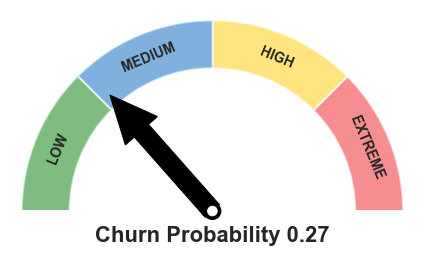

In [189]:
gauge(Probability=rf_model.predict_proba(test_x.iloc[0:1])[0,1])